In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [4]:
df.shape

(32165, 8)

In [5]:
df.isnull().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [7]:
df["name_of_drug"].value_counts() 

Levonorgestrel                       724
Etonogestrel                         628
Ethinyl estradiol / norethindrone    547
Ethinyl estradiol / norgestimate     425
Nexplanon                            397
                                    ... 
Azasite                                1
Estraderm                              1
GenTeal                                1
Cromolyn                               1
Paclitaxel                             1
Name: name_of_drug, Length: 2220, dtype: int64

In [9]:
df.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


Distribution of Rating

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Rating'}, xlabel='effectiveness_rating', ylabel='Density'>

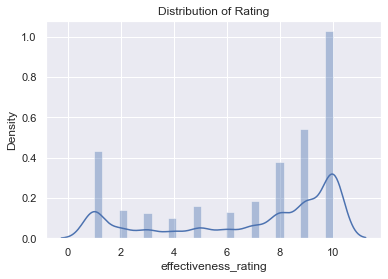

In [10]:
sns.set(font_scale=1)
plt.title("Distribution of Rating")
sns.distplot(df["effectiveness_rating"])

Rating

<AxesSubplot:title={'center':'Boxplot for rating'}, xlabel='name_of_drug', ylabel='effectiveness_rating'>

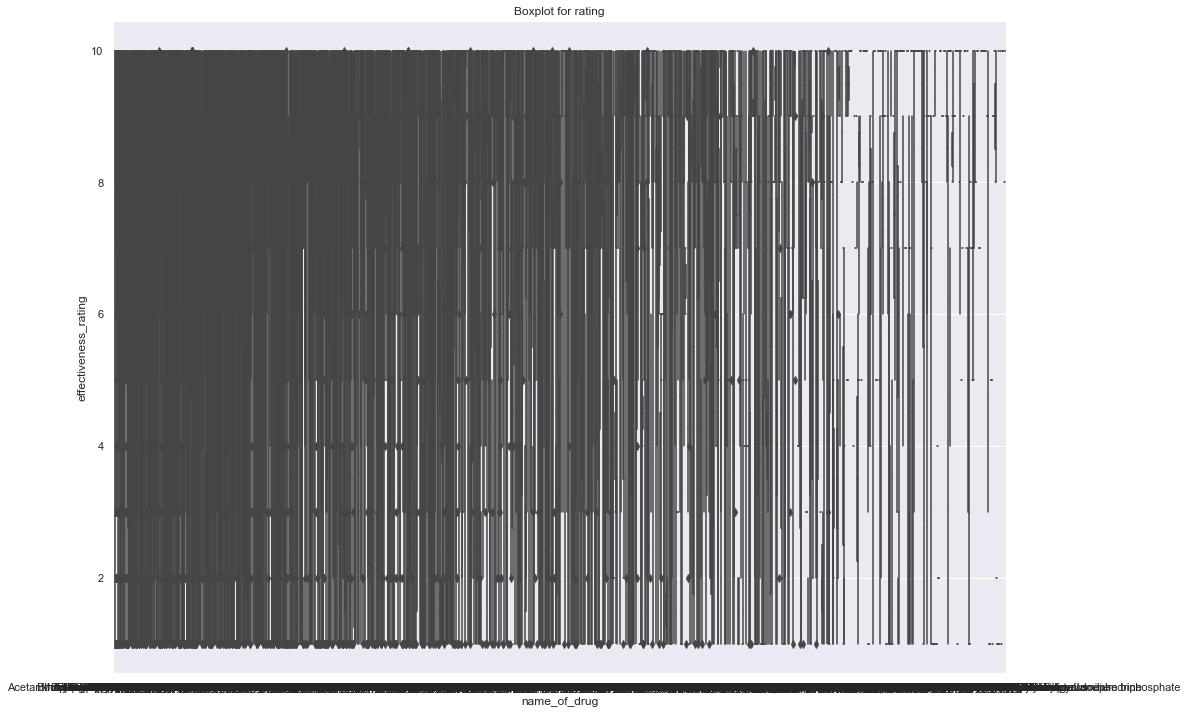

In [14]:
plt.figure(figsize=(16,12))
plt.title("Boxplot for rating")
sns.boxplot(x="name_of_drug",y="effectiveness_rating",data=df)

In [12]:
df.groupby("name_of_drug").mean()["effectiveness_rating"].sort_values(ascending=False)

name_of_drug
Lamivudine                      10.0
Salivart                        10.0
Sanctura XR                     10.0
Sancuso                         10.0
Sarafem                         10.0
                                ... 
Melpaque HP                      1.0
Beconase AQ                      1.0
Menactra                         1.0
Immune globulin subcutaneous     1.0
Chondroitin / glucosamine        1.0
Name: effectiveness_rating, Length: 2220, dtype: float64

Drugs

In [ ]:
df["use_case_for_drug"].value_counts()

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Drug wise Condition Distribution")
sns.countplot(x="use_case_for_drug",hue="name_of_drug",data=df)

Boxplot

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Boxplot of Condition")
sns.boxplot(x="use_case_for_drug",y="effectiveness_rating",data=df)

In [ ]:
df.head()

One hot Encode Function

In [ ]:
def one_hot_encode(dataframe, col):
    dummy = pd.get_dummies(dataframe[col],drop_first=True)
    dummy.columns = [str(i)+"_dumy_"+col for i in range(len(dummy.columns))]
    dataframe = dataframe.join(dummy)
    dataframe.drop([col],axis=1,inplace=True)
    return dataframe

In [ ]:
df = one_hot_encode(df,"use_case_for_drug")

In [ ]:
df.head()

Boxplot

In [ ]:
plt.figure(figsize=(12,10))
plt.title("Boxplot of Blood Pressure")
sns.boxplot(x="BP",y="Age",data=df)

In [ ]:
#One hot Encode the BP variable
df = one_hot_encode(df,"BP")

In [ ]:
df.head()

In [ ]:
sns.distplot(df["Na_to_K"])
#There seems to be some outliers present

In [ ]:
sns.boxplot(df["Na_to_K"])

In [ ]:
plt.figure(figsize=(12,9))
sns.boxplot(x="Drug",y="Na_to_K",data=df)

In [ ]:
df[df.Na_to_K>32]

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Age",y="Na_to_K",data=df,hue="Drug",s=500,alpha=0.7)

In [ ]:
df["Cholesterol"].value_counts()

In [ ]:
df = one_hot_encode(df,"Cholesterol")

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
df["Drug"] = lb.fit_transform(df["Drug"])

In [ ]:
df.head()

In [ ]:
lb.classes_

In [ ]:
df.columns

In [ ]:
numerical_feats = df[["Age",'Na_to_K']]

In [ ]:
numerical_feats

In [ ]:
X = df.drop(["Drug"],axis=1).values
y = df["Drug"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=15,random_state=42,stratify=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, p=2 )
knn.fit(scaled_X_train,y_train)

In [ ]:
pred_k = knn.predict(scaled_X_test)

In [ ]:
from sklearn import metrics
def evaluate_result(true,pred):
    print(metrics.classification_report(true,pred))
    print(metrics.accuracy_score(true,pred))

In [ ]:
evaluate_result(y_test,pred_k)

In [ ]:
sc = MinMaxScaler()
scaled_X = sc.fit_transform(X)

In [ ]:
predictions = knn.predict(scaled_X)

In [ ]:
df=df.join(pd.DataFrame(predictions,columns=["predictions"]))

In [ ]:
df[["Drug","predictions"]]

In [ ]:
evaluate_result(df.Drug,df.predictions)

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age',y="Na_to_K",hue="Drug",data=df,s=500,alpha=0.5)

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age',y="Na_to_K",hue="predictions",data=df,s=500,alpha=0.5)